### IMPLEMENTING HOUSE PRICE PREDICTION (FOR IEEE RECRUITMENTS)

 #### Importing libraries

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

#### Loading Dataset

In [414]:
data = pd.read_csv(r'C:\Users\Sai Harish G\Downloads\archive\data.csv')

#### Exploratory Data Analysis

In [415]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [416]:
data.shape

(498, 18)

#### As we can see there are 498 rows and 18 columns accounting to 8964 values.

In [417]:
data.nunique()

date              11
price            362
bedrooms           8
bathrooms         19
sqft_living      254
sqft_lot         440
floors             5
waterfront         2
view               5
condition          5
sqft_above       220
sqft_basement    111
yr_built         105
yr_renovated      42
street           497
city              35
statezip          69
country            1
dtype: int64

#### We can see that this dataset doesn't have NaN values

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           498 non-null    object 
 1   price          498 non-null    int64  
 2   bedrooms       498 non-null    int64  
 3   bathrooms      498 non-null    float64
 4   sqft_living    498 non-null    int64  
 5   sqft_lot       498 non-null    int64  
 6   floors         498 non-null    float64
 7   waterfront     498 non-null    int64  
 8   view           498 non-null    int64  
 9   condition      498 non-null    int64  
 10  sqft_above     498 non-null    int64  
 11  sqft_basement  498 non-null    int64  
 12  yr_built       498 non-null    int64  
 13  yr_renovated   498 non-null    int64  
 14  street         498 non-null    object 
 15  city           498 non-null    object 
 16  statezip       498 non-null    object 
 17  country        498 non-null    object 
dtypes: float64

In [419]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,498.0,551532.267068,345673.675416,100000.0,335000.00,484500.00,630000.0,3200000.0
bedrooms,498.0,3.411647,0.950074,1.0,3.00,3.00,4.0,9.0
bathrooms,498.0,2.162651,0.799680,1.0,1.75,2.25,2.5,8.0
sqft_living,498.0,2129.315261,1045.932985,720.0,1420.00,1940.00,2557.5,13540.0
sqft_lot,498.0,17738.164659,39656.039398,681.0,5057.50,7761.50,11317.5,435600.0
floors,498.0,1.502008,0.569157,1.0,1.00,1.50,2.0,3.0
waterfront,498.0,0.006024,0.077459,0.0,0.00,0.00,0.0,1.0
view,498.0,0.190763,0.678615,0.0,0.00,0.00,0.0,4.0
condition,498.0,3.445783,0.666889,1.0,3.00,3.00,4.0,5.0
sqft_above,498.0,1805.931727,893.891413,650.0,1180.00,1550.00,2190.0,9410.0


C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_15972\1931379774.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mask = np.triu(corr_data.corr())
C:\Users\Sai Harish G\AppData\Local\Temp\ipykernel_15972\1931379774.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h_map = sns.heatmap(corr_data.corr(), mask = corr_mask, cmap = 'Blues')


<Axes: >

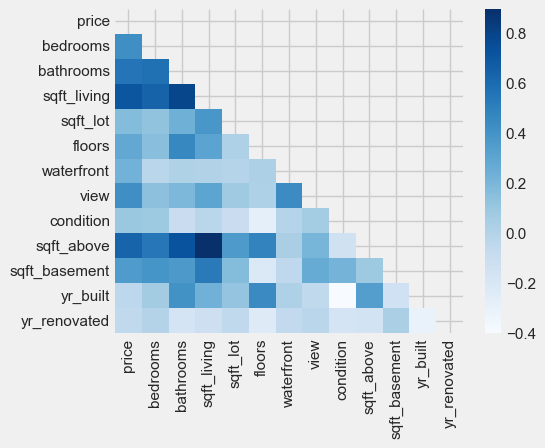

In [420]:
plt.figure(figsize=(5,4))
corr_data = data.drop(['date'], axis = 1)

corr_mask = np.triu(corr_data.corr())
h_map = sns.heatmap(corr_data.corr(), mask = corr_mask, cmap = 'Blues')
h_map

### Price
#### Let's delete the outliers by implementing the remove_outliers function.

In [421]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

In [422]:
data = remove_outliers(data, 'price')

Outliers of price are removed.



In [423]:
data.shape

(467, 18)

In [424]:
print('min: ',data.price.min())
print('max: ',data.price.max())
print('mean: ',data.price.mean())

min:  100000
max:  1050000
mean:  484059.9164882227


<Axes: xlabel='price', ylabel='Count'>

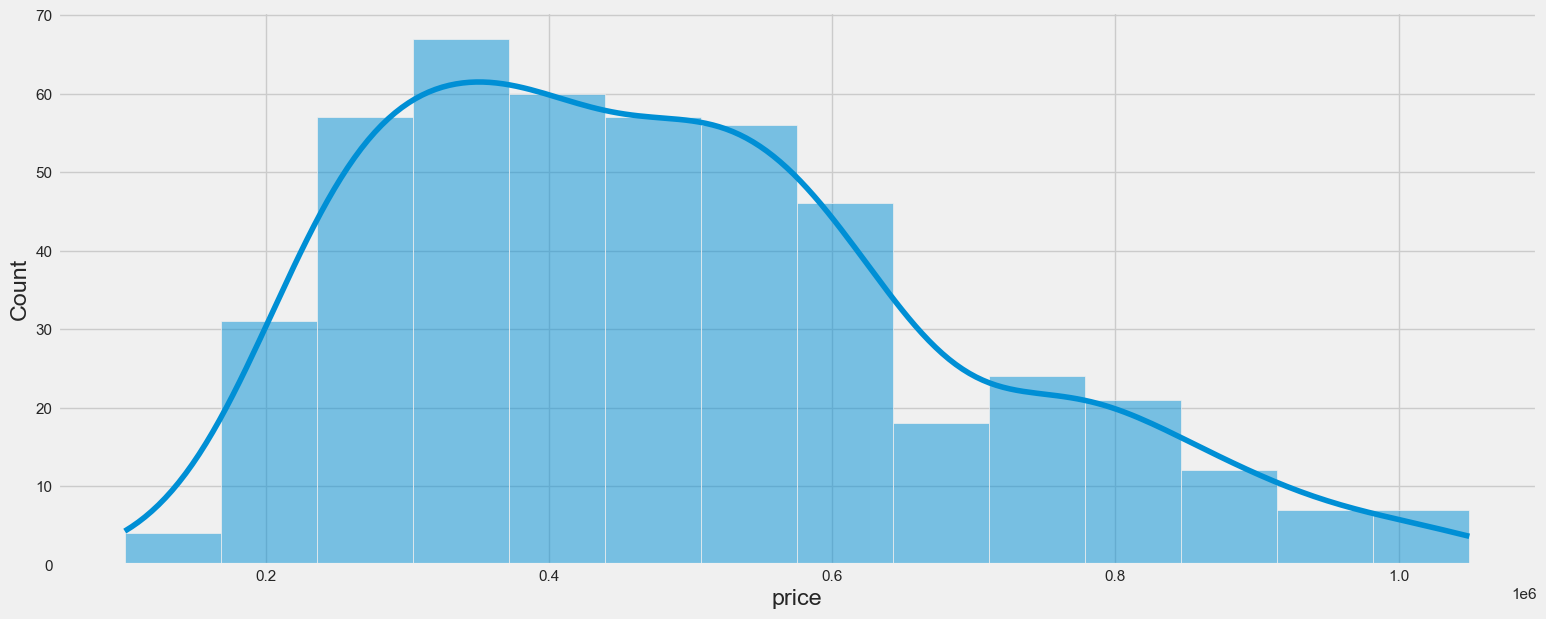

In [425]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0, :])
sns.histplot(data['price'], ax=ax1, kde=True)

Text(0.5, 0, 'index')

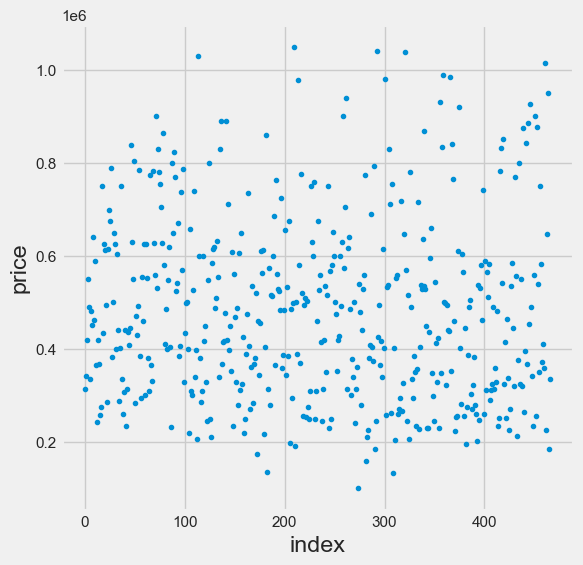

In [426]:
y = np.array(data.price)
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.plot(range(len(y)), y, '.')
plt.ylabel('price')
plt.xlabel('index')


### Date

In [427]:
data.date = pd.to_datetime(data.date)


In [428]:
data.date.dt.year.value_counts()

2014    467
Name: date, dtype: int64

<Axes: xlabel='date', ylabel='price'>

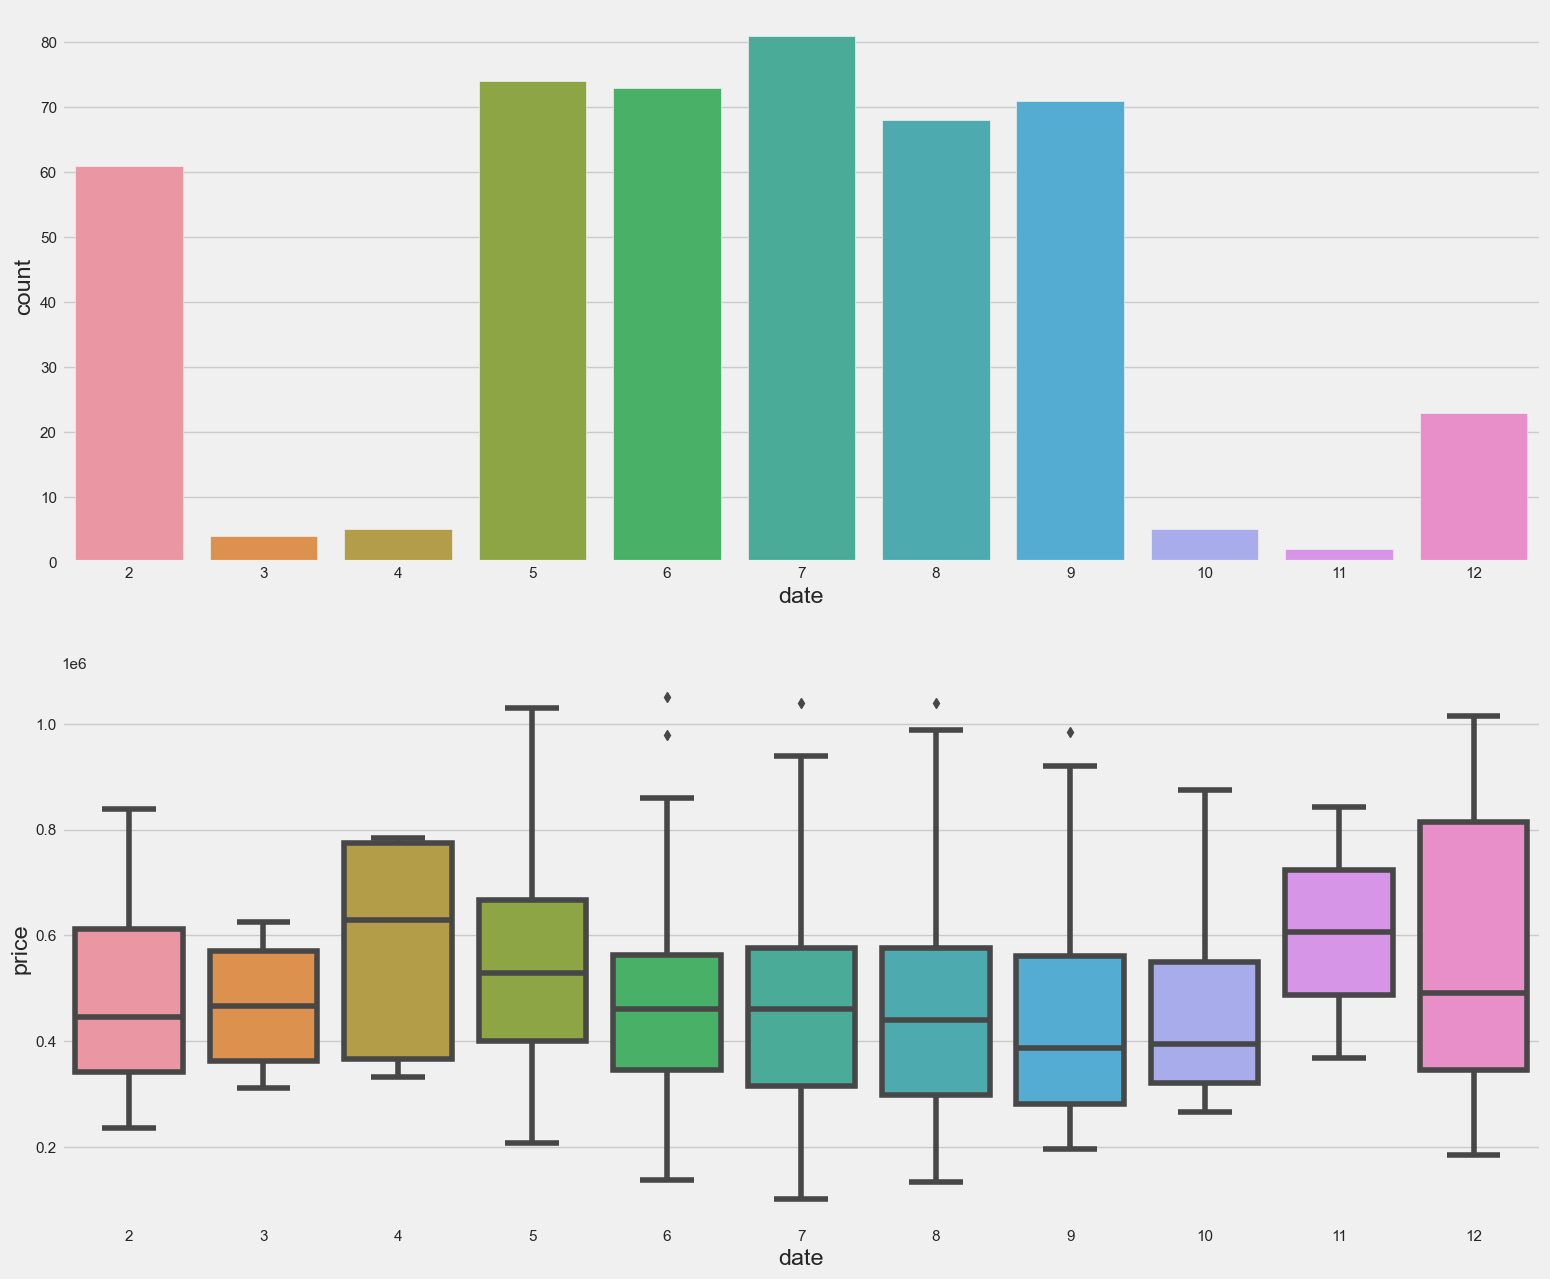

In [429]:
fig = plt.figure(figsize=(17, 15))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(x=data.date.dt.month, ax=ax1)

ax2 = fig.add_subplot(grid[1, :])
sns.boxplot(x=data.date.dt.month, y='price', data=data, ax=ax2)

#### The previous visualization shows the relation between price and months.

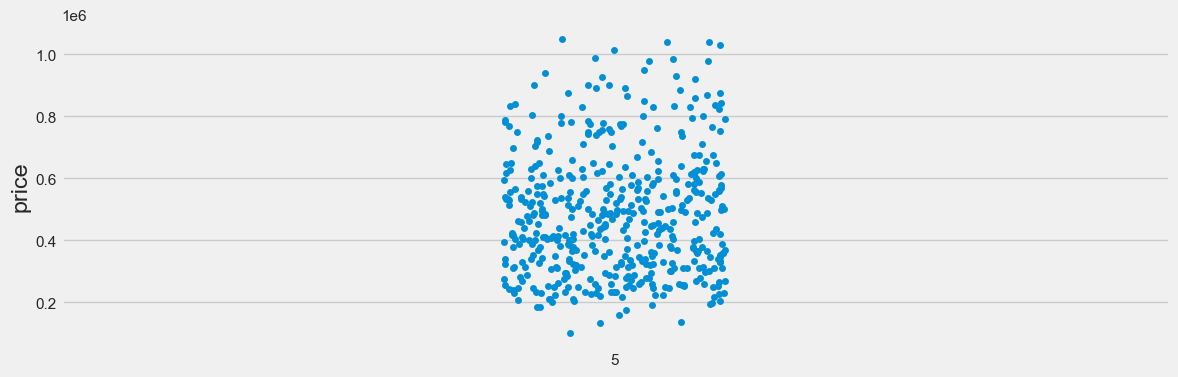

In [430]:
sns.catplot(x=data.date.dt.day.values, y='price', data=data, height=4, aspect=3)

The previous visualization shows the relation between price and days.

It's obvious now from the visualizations that date column is useless,and have to be deleted 

In [431]:
data.drop('date', axis=1, inplace=True)

In [432]:
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


### VIEW

0    434
2     15
1     12
3      4
4      2
Name: view, dtype: int64


<Axes: ylabel='view'>

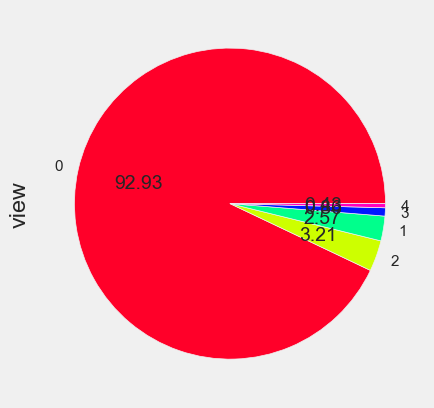

In [433]:
print(data.view.value_counts())

data["view"].value_counts().plot(kind = "pie" ,
                                 autopct = "%.2f" , cmap = "gist_rainbow")

### CONDITION

3    288
4    139
5     34
2      5
1      1
Name: condition, dtype: int64


<Axes: xlabel='condition', ylabel='price'>

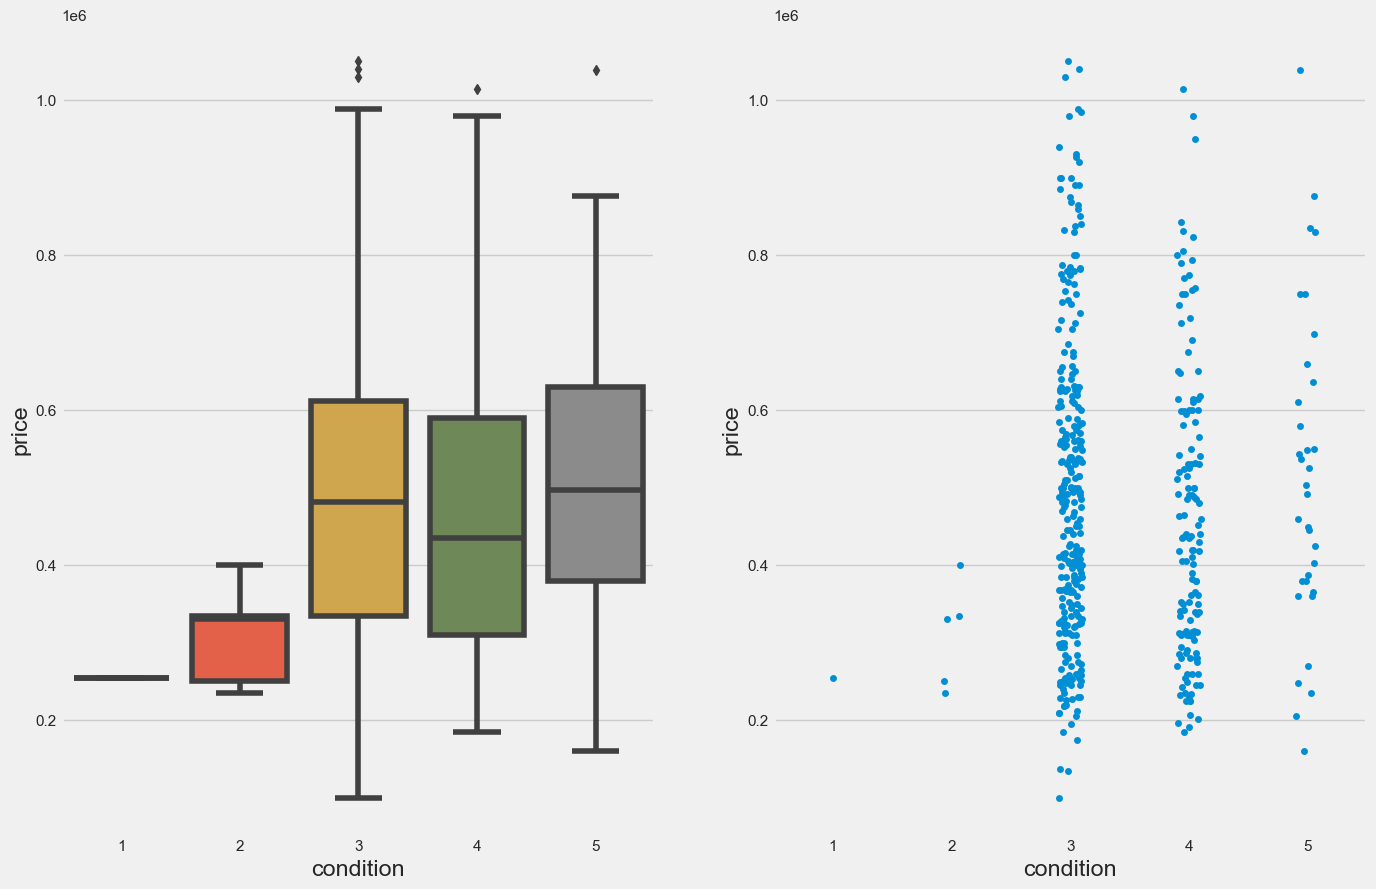

In [434]:
print(data.condition.value_counts())

fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(121)
sns.boxplot(x='condition', y='price', data=data, ax=ax1)

ax2 = fig.add_subplot(122)
sns.stripplot(x='condition', y='price', data=data, ax=ax2)

In [435]:
data.street.value_counts()

24345 35th Pl S         2
18810 Densmore Ave N    1
434 Pullman Ave         1
15020 SE 281st St       1
28123 123rd Pl SE       1
                       ..
9712 4th Ave NW         1
310 NW 72nd St          1
6422 Marshall Ave SW    1
25305 151st Pl SE       1
17217 Woodside Dr SE    1
Name: street, Length: 466, dtype: int64

In [436]:
data.city.value_counts().head(10)

Seattle        161
Renton          34
Issaquah        26
Bellevue        25
Redmond         23
Kirkland        20
Kent            19
Federal Way     17
Sammamish       17
Auburn          16
Name: city, dtype: int64

<Axes: ylabel='city'>

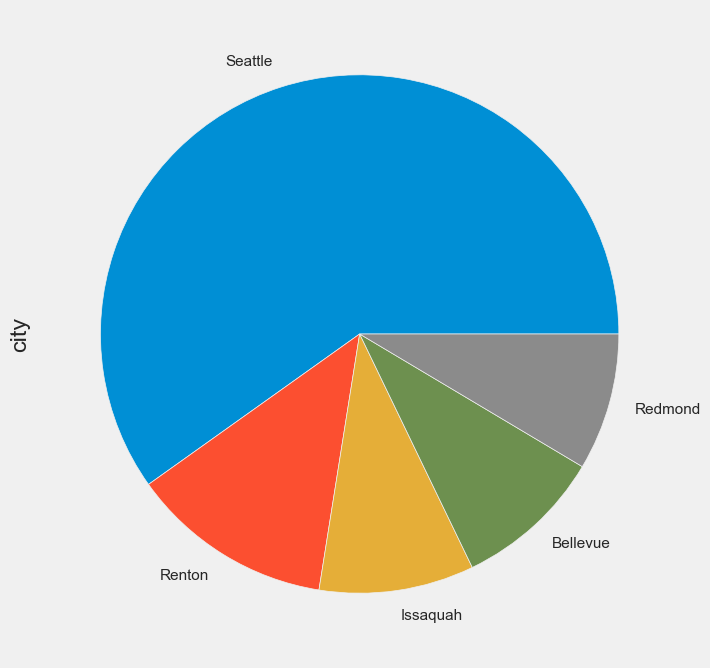

In [437]:
fig = plt.figure(figsize=(12, 8))
# Top 5 cities
data.city.value_counts().head(5).plot.pie()

In [438]:
print(data.statezip.nunique())
print(data.statezip.value_counts())

68
WA 98103    22
WA 98027    19
WA 98115    16
WA 98117    15
WA 98052    15
            ..
WA 98102     2
WA 98011     2
WA 98288     1
WA 98108     1
WA 98070     1
Name: statezip, Length: 68, dtype: int64


In [439]:
print(data.shape)
data.head(3)

(467, 17)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


### FINAL CLEANING OF DATA 

In [440]:
data = data.drop(['statezip', 'street', 'city', 'country'], axis=1)
print(data)

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    313000         3       1.50         1340      7912     1.5           0   
2    342000         3       2.00         1930     11947     1.0           0   
3    420000         3       2.25         2000      8030     1.0           0   
4    550000         4       2.50         1940     10500     1.0           0   
5    490000         2       1.00          880      6380     1.0           0   
..      ...       ...        ...          ...       ...     ...         ...   
493  225000         3       1.00          990      8012     1.0           0   
494  647000         4       2.50         3040      6887     2.0           0   
495  950000         5       3.00         4530    258746     1.5           0   
496  185000         3       1.50         1370      8470     1.0           0   
497  335000         3       2.50         1940      4927     2.0           0   

     view  condition  sqft_above  sqft_basement  yr

# PREDICTION Using Linear Regression

In [441]:
X = data.drop(['price'], axis=1)
y = data.price

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [443]:
from sklearn.linear_model import LinearRegression
linerR = LinearRegression()
linerR.fit(X_train, y_train)

LinearRegression()

In [444]:
y = linerR.predict(X_test)

In [445]:
linerR.score(X_test,y_test)

0.48169063517339317

# FINAL GRAPHICAL REPRESENTATION

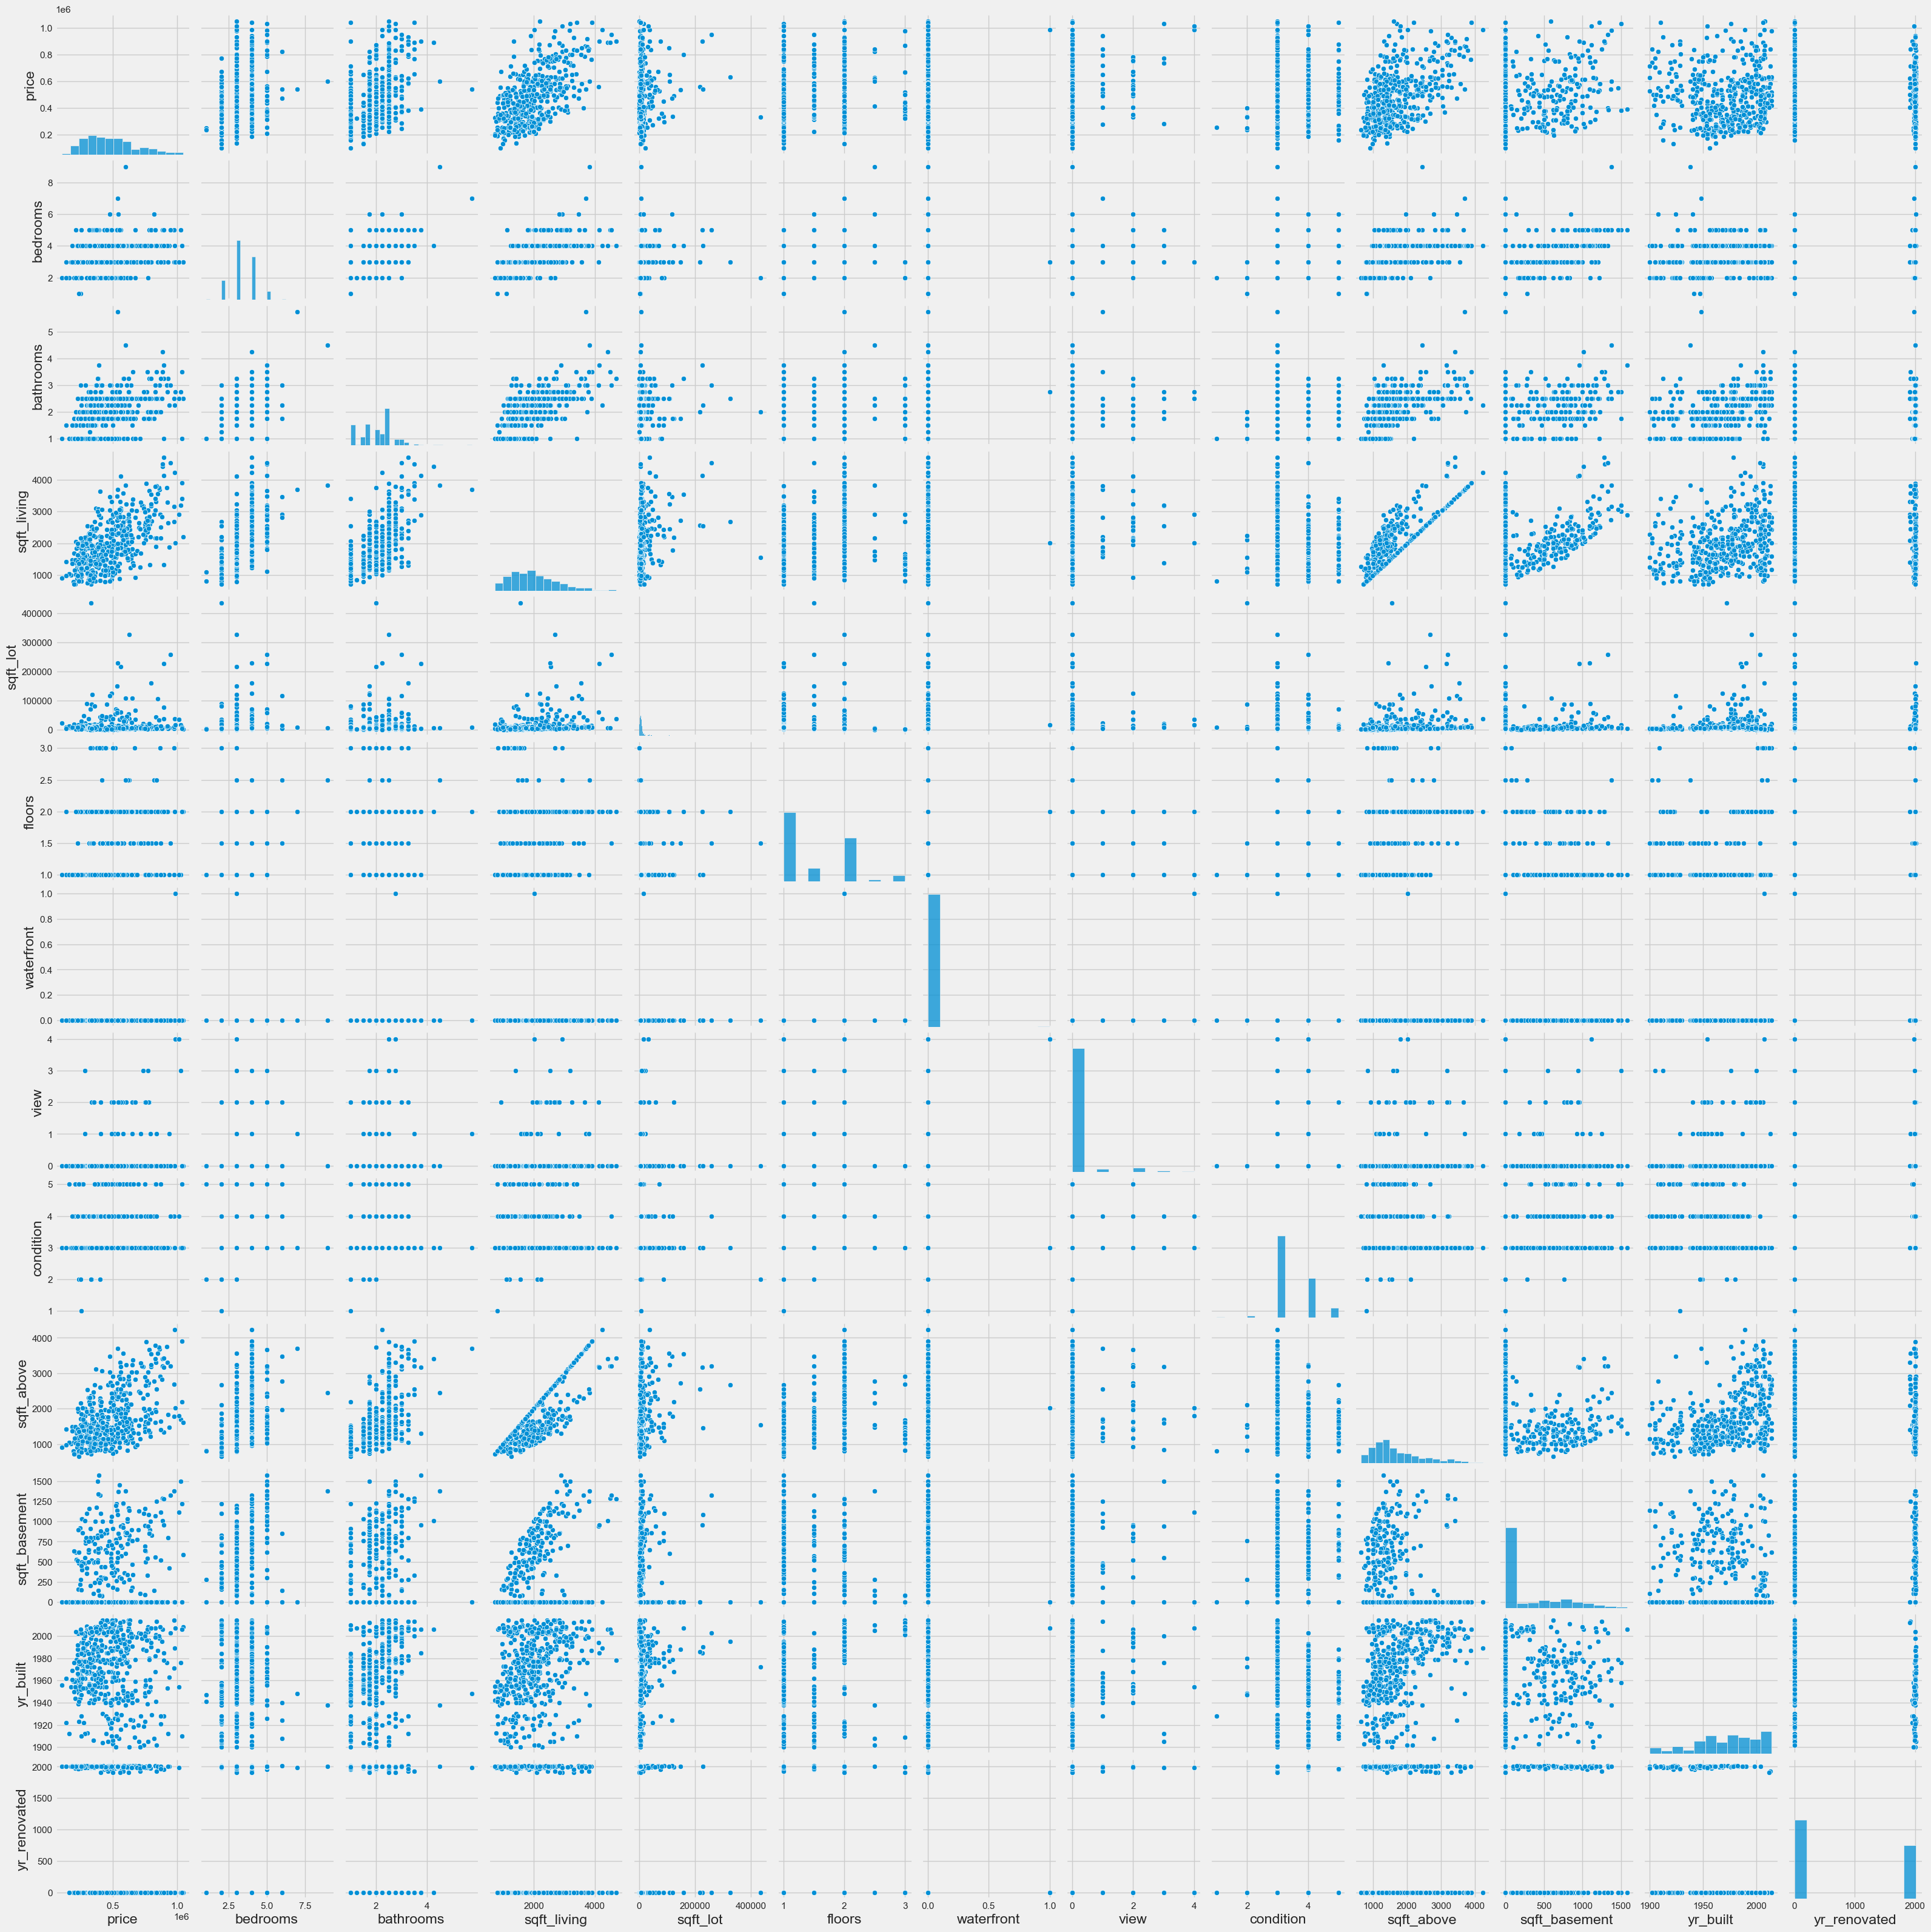

In [447]:
sns.pairplot(data)